# EDA: Анализ тренировочного датасета

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
from datasets import Dataset

**Шаг 1: Загрузка данных**

In [67]:
file_path = '../data/raw/payments_training.tsv'
data = pd.read_csv(file_path, sep='\t', header=None, names=['id', 'date', 'amount', 'description', 'category'])

file_path = '../data/raw/payments_main.tsv'
data_main = pd.read_csv(file_path, sep='\t', header=None, names=['id', 'date', 'amount', 'description'])

In [70]:
data

,id,date,amount,description,category
0,1,07.11.2024,15300.00,За участие в конференции в г. Майкоп по догово...,SERVICE
1,2,07.11.2024,"40200,00",За оказание услуг по договору №79-02726В от 01...,SERVICE
2,3,07.11.2024,1440-00,Оплата за Порошок стиральный Ariel Color autom...,NON_FOOD_GOODS
3,4,07.11.2024,240000000-00,Возврат денежных средств по договору займа №04...,LOAN
4,5,07.11.2024,1360000.00,"Оплата Дог №452 от 13/03/2021, согл. Сч 0745-2...",NOT_CLASSIFIED
...,...,...,...,...,...
495,496,07.11.2024,2610.00,Оплата налогов,TAX
496,497,07.11.2024,31200-00,Комиссия за выполнение функций агента валютног...,BANK_SERVICE
497,498,07.11.2024,18200-00,За тур.поездку по договору №75-04243Г от 24/04...,SERVICE
498,499,07.11.2024,"2870000,00","Оплата по договору №095 от 24.02.2025г, счету ...",FOOD_GOODS


In [69]:
data_main

,id,date,amount,description
0,1,07.11.2024,40500.00,За тур.поездку по договору №001 от 27.01.2023г
1,2,07.11.2024,"32600,00",За оказание услуг по договору №53Б-02746 от 23...
2,3,07.11.2024,4710-00,Оплата штрафа
3,4,07.11.2024,30900-00,Лечение по договору №Д-00359/24 от 08.03.2025
4,5,07.11.2024,13200.00,Оплата основного долга за период с 16.12.2024г...
...,...,...,...,...
24995,24996,07.11.2024,"3300000,00",Оплата по договору №Е01905 от 25.02.2023. сырь...
24996,24997,07.11.2024,"2270,00",гос.услуга
24997,24998,07.11.2024,1750000.00,Предоставление кредита по договору №Д-00803/03...
24998,24999,07.11.2024,3560.00,Оплата гос. пошлины


**Шаг 2: EDA**

In [73]:
def eda_summary(data, title):
    print(f"\n{title}\n")
    print("\nСтатистики по суммам:")
    print(data['amount'].describe())
    print("\nПримеры записей:")
    print(data.sample(5))

# Визуализация распределения классов
def plot_distribution(data, title):
    class_counts = data['category'].value_counts(normalize=True)
    class_counts.plot(kind='bar')
    plt.title(title)
    plt.ylabel('Proportion')
    plt.show()



Общий набор данных


Статистики по суммам:
count       25000
unique       5024
top       4060-00
freq           16
Name: amount, dtype: object

Примеры записей:
          id        date        amount  \
17987  17988  07.11.2024      48900.00   
6169    6170  07.11.2024      25600,00   
21373  21374  07.11.2024  371000000.00   
14661  14662  07.11.2024      43900,00   
10053  10054  07.11.2024    4510000,00   

                                             description  
17987  За оказание услуг по договору №162 от 13.11.2025г  
6169                  Выплата на содержание родных детей  
21373  Оплата ДКП №09-02232 от 26.03.2023 г. за котте...  
14661  Оплата за ж/д, авиабилеты и проживание по счет...  
10053  Оплата по договору процентного займа (20%) №23...  


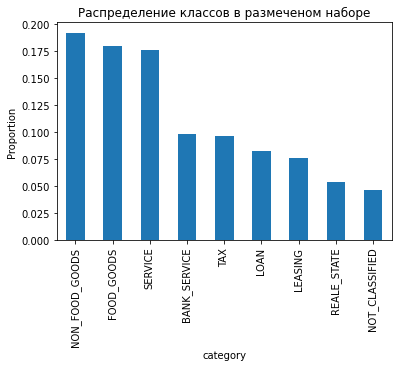

In [74]:
# EDA для полного набора данных
eda_summary(data_main, "Общий набор данных")
plot_distribution(data, "Распределение классов в размеченом наборе")

**Шаг 3: Анализ длинны текста**

<ipython-input-77-cd8169cb5346>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_length'] = data['text'].apply(len)
<ipython-input-77-cd8169cb5346>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_tokens'] = tokenized.apply(lambda x: len(x['input_ids']))



Статистика по длине текстов и токенов:
        text_length    num_tokens
count  25000.000000  25000.000000
mean     119.879680     50.303280
std       36.741664     14.829531
min       35.000000     20.000000
25%      104.000000     42.000000
50%      130.000000     53.000000
75%      145.000000     61.000000
max      212.000000     85.000000

Доля текстов, превышающих 128 токенов: 0.00%


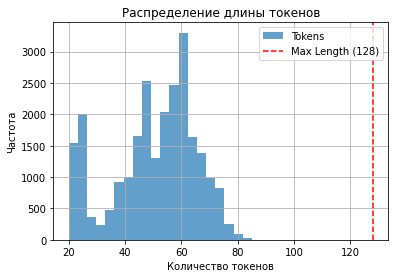

In [77]:
def preprocess_data(df):
    df['text'] = df.apply(lambda x: f"{x['date']} [SEP] {x['amount']} [SEP] {x['description']}", axis=1)
    df = df[['text']]
    return df

data_main = preprocess_data(data_main)

model_name = "ai-forever/ru-en-RoSBERTa"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_data(batch):
    return tokenizer(batch['text'], padding=True, truncation=True, max_length=128)

def analyze_text_length(data, tokenizer, max_length):
    data['text_length'] = data['text'].apply(len)
    tokenized = data['text'].apply(lambda x: tokenizer(x, truncation=False))  
    data['num_tokens'] = tokenized.apply(lambda x: len(x['input_ids'])) 
    
    text_stats = data[['text_length', 'num_tokens']].describe()
    print("\nСтатистика по длине текстов и токенов:")
    print(text_stats)
    
    over_limit = (data['num_tokens'] > max_length).mean()
    print(f"\nДоля текстов, превышающих {max_length} токенов: {over_limit:.2%}")
    
    data['num_tokens'].hist(bins=20, alpha=0.7, label='Tokens')
    plt.axvline(max_length, color='red', linestyle='--', label=f'Max Length ({max_length})')
    plt.title("Распределение длины токенов")
    plt.xlabel("Количество токенов")
    plt.ylabel("Частота")
    plt.legend()
    plt.show()

# Анализ длины текстов на тренировочной выборке
analyze_text_length(data_main, tokenizer, max_length=128)